In [49]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split

## Preprocessing Image Data

In [23]:
def create_path_name(file_path, folder_path):
    return folder_path + file_path

In [25]:
# List
path_monkeyPox = "./data/Original Images/Original Images/Monkey Pox/"
path_other = "./data/Original Images/Original Images/Others/"
monkeyPox_data = list(map(lambda x : create_path_name(x,path_monkeyPox), os.listdir(path_monkeyPox)))
other_data = list(map(lambda x : create_path_name(x,path_other), os.listdir(path_other)))

In [126]:
def preprocess(path_img):
    img = cv2.imread(path_img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

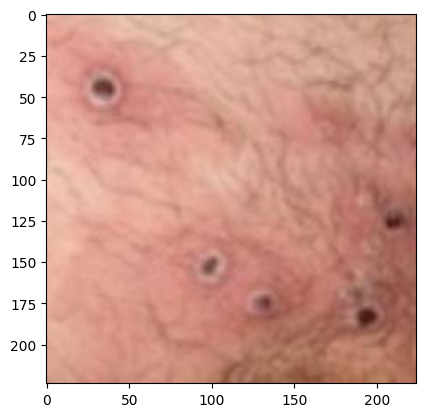

In [129]:
img = preprocess(monkeyPox_data[0])
plt.imshow(img/255.)

## Load model

In [32]:
model = tf.keras.models.load_model('./model/monkey pox_82.75.h5')
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                            

In [111]:
# Label {0: "monkeyPox", 1:"other"}
model.predict(img[0].reshape((1,224,224,3)))

1/1 [==============================] - 0s 164ms/step


array([[0.9607333 , 0.03926668]], dtype=float32)

## Gradio

In [141]:
import gradio as gr

In [150]:
def classify_image(img):
    img = img.reshape((-1,224,224,3))
    prediction = model.predict(img).flatten()
    confidences = {'monkeypox': float(prediction[0]), 'other':float(prediction[1])}
    return confidences

In [151]:
gr.Interface(fn=classify_image,
             inputs=gr.Image(shape=(224,224)),
             outputs=gr.Label(),
             examples=[monkeyPox_data[0], monkeyPox_data[1], other_data[0], other_data[1]]
             ).launch()

Running on local URL:  http://127.0.0.1:7867

To create a public link, set `share=True` in `launch()`.
